In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Enable inline plots for Google Colab
%matplotlib inline


In [ ]:
import pandas as pd

# Load the dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("/content/googleplaystore.csv")

# Show first few rows
df.head()


Saving googleplaystore.csv to googleplaystore.csv


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Shape of dataset
print("Shape:", df.shape)

# Column names
print("Columns:", df.columns.tolist())

# Dataset info
df.info()

# Summary statistics
df.describe(include='all')


Shape: (10841, 13)
Columns: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memor

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check for missing values
df.isnull().sum()

# Drop rows with null App names
df = df[df['App'].notnull()]

# Remove duplicate apps
df.drop_duplicates(subset='App', keep='first', inplace=True)

# Clean 'Installs' column (remove '+' and ','), then convert to numeric
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Clean 'Price' column (remove '$'), then convert to numeric
df['Price'] = df['Price'].str.replace('$', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Convert 'Reviews' to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Clean 'Size' column
def clean_size(size):
    size = str(size)
    if size.endswith('M'):
        return float(size.replace('M', '')) * 1_000_000
    elif size.endswith('k'):
        return float(size.replace('k', '')) * 1_000
    elif 'Varies with device' in size:
        return np.nan
    else:
        return np.nan

df['Size'] = df['Size'].apply(clean_size)

# Fill missing sizes with median
df['Size'].fillna(df['Size'].median(), inplace=True)

# Convert Ratings to numeric and drop rows with NaN
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df.dropna(subset=['Rating'], inplace=True)


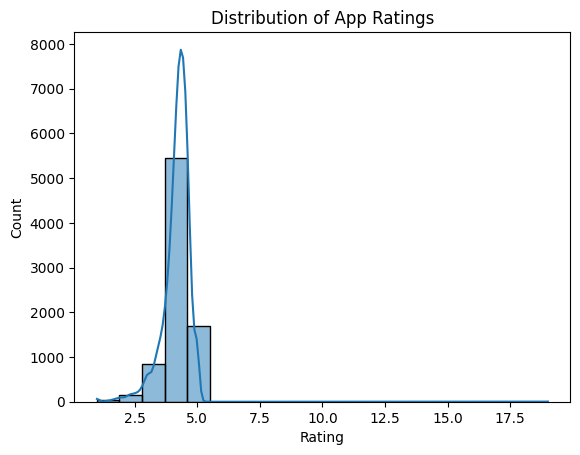

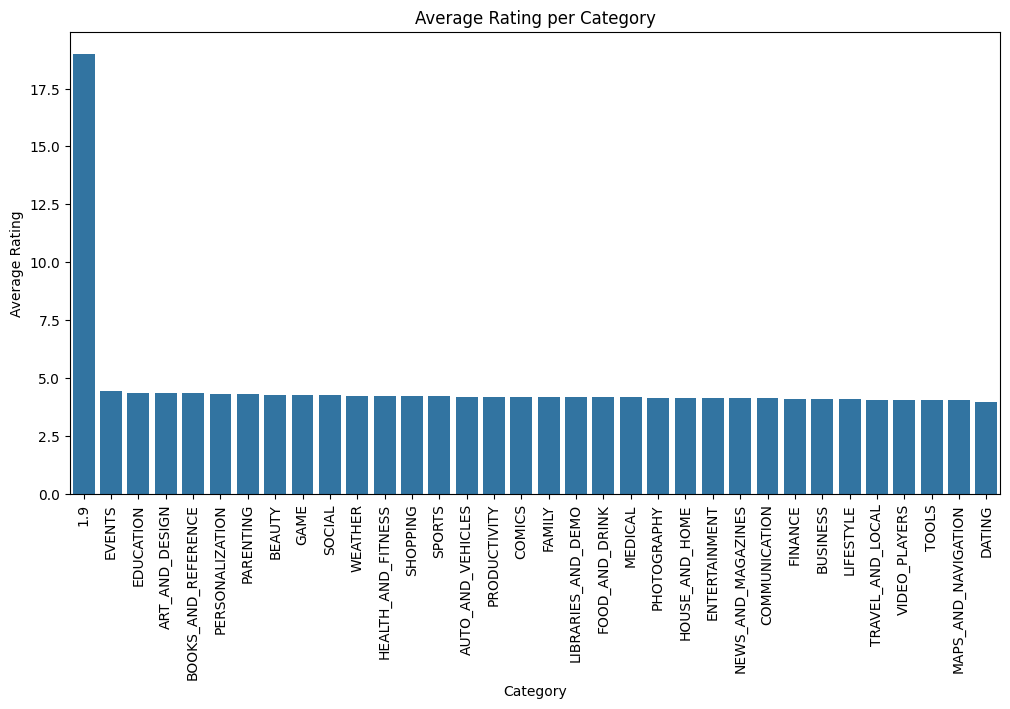

In [ ]:
# Rating distribution
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Categories vs Average Rating
plt.figure(figsize=(12, 6))
category_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=category_rating.index, y=category_rating.values)
plt.xticks(rotation=90)
plt.title('Average Rating per Category')
plt.ylabel('Average Rating')
plt.show()


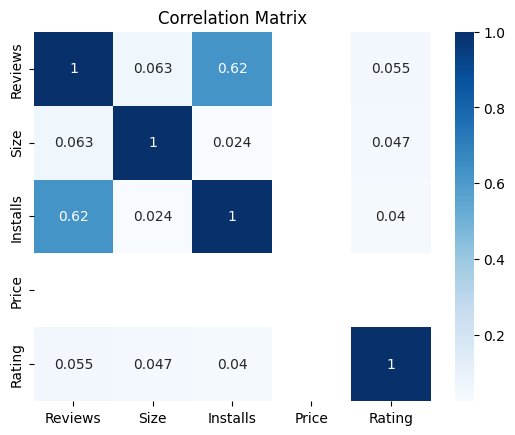

In [ ]:
# Correlation matrix
corr = df[['Reviews', 'Size', 'Installs', 'Price', 'Rating']].corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()


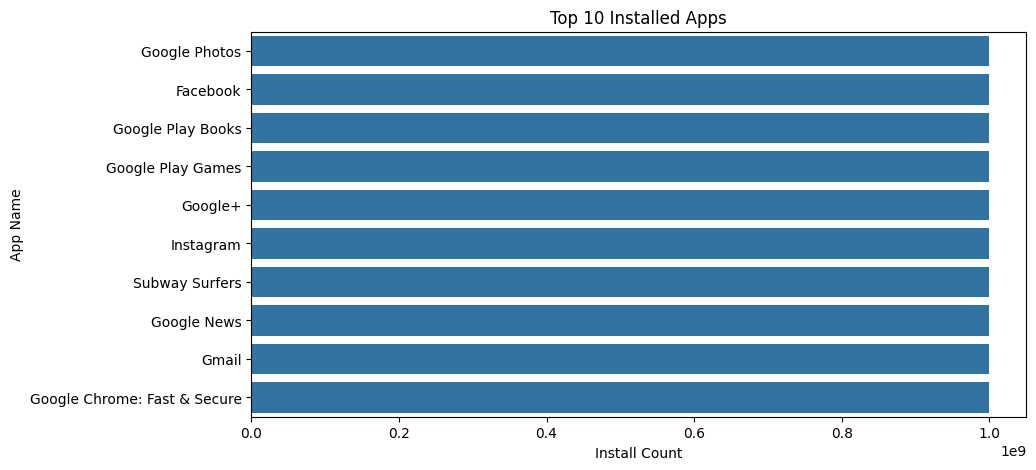

In [ ]:
# Top 10 installed apps
top_installs = df[['App', 'Installs']].sort_values(by='Installs', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x='Installs', y='App', data=top_installs)
plt.title('Top 10 Installed Apps')
plt.xlabel('Install Count')
plt.ylabel('App Name')
plt.show()


In [ ]:
df.to_csv("cleaned_googleplaystore.csv", index=False)


#USER REVIEWS

Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For sentiment analysis (optional NLP)
from wordcloud import WordCloud
import nltk
from textblob import TextBlob

# Download necessary NLTK data
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd

# Load the dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("/content/googleplaystore_user_reviews.csv")

# Show first few rows
df.head()


Saving googleplaystore_user_reviews.csv to googleplaystore_user_reviews (2).csv


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
print("Missing values:\n", df.isnull().sum())
df = df.dropna(subset=['Translated_Review']).reset_index(drop=True)

# Step 5: Confirm the cleaned DataFrame shape
print("New shape after dropping nulls:", df.shape)

Missing values:
 App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64
New shape after dropping nulls: (37427, 5)


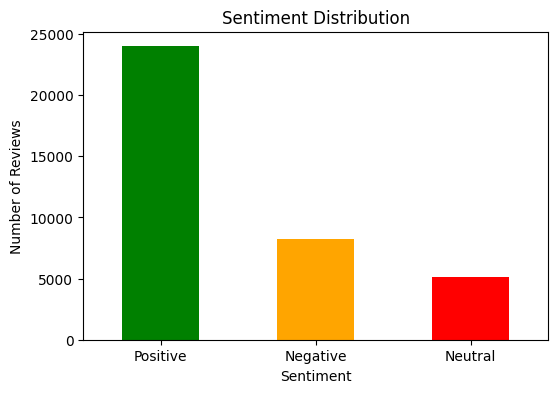

In [ ]:
# Check value counts
sentiment_counts = df['Sentiment'].value_counts()

# Plot
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()


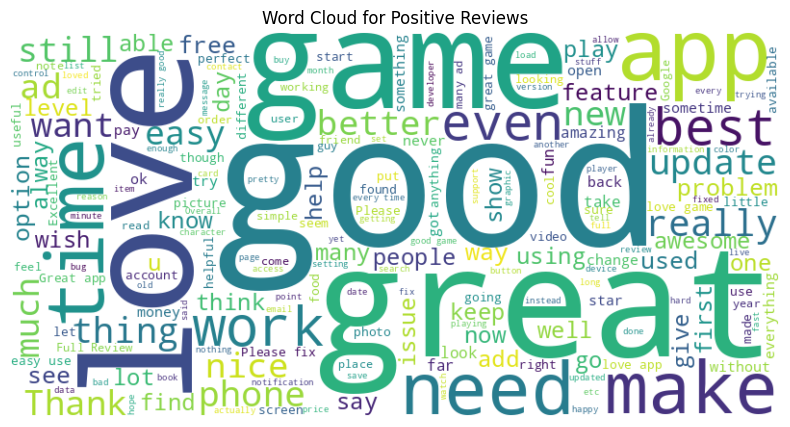

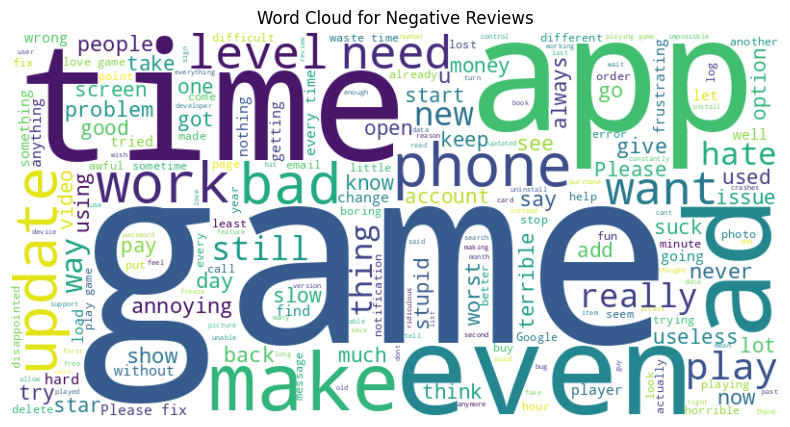

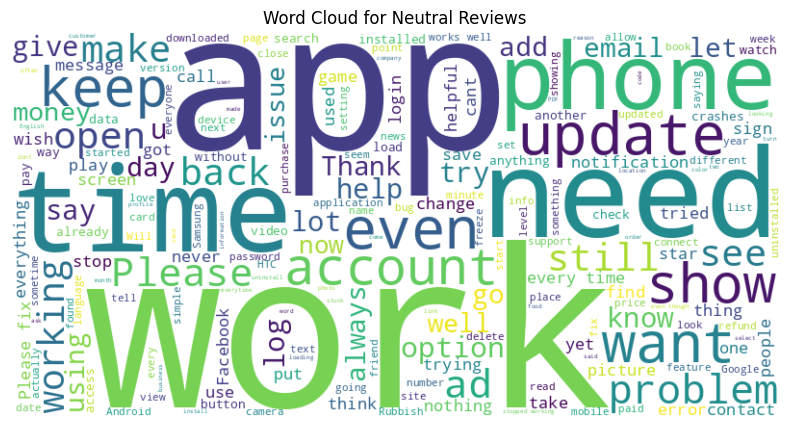

In [ ]:
# Generate word clouds
for sentiment in ['Positive', 'Negative', 'Neutral']:
    text = ' '.join(df[df['Sentiment'] == sentiment]['Translated_Review'].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.show()


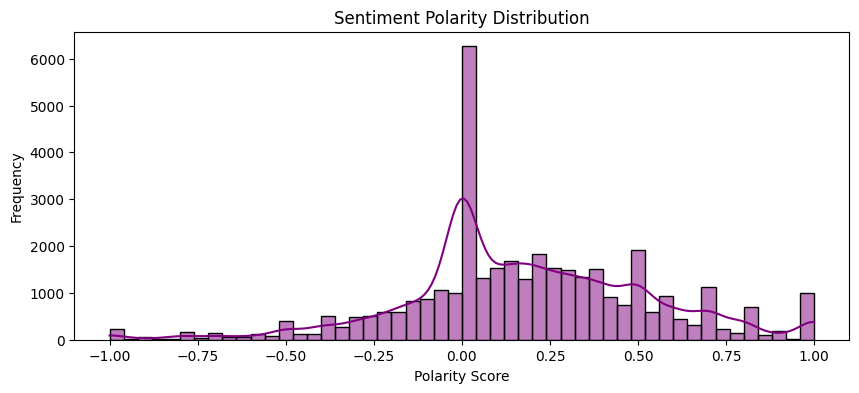

In [ ]:
# Compute polarity scores
df['polarity'] = df['Translated_Review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Plot polarity distribution
plt.figure(figsize=(10,4))
sns.histplot(df['polarity'], bins=50, kde=True, color='purple')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()
